
# Label Propagation

---

**Label Propagation** es un algoritmo de **aprendizaje semi-supervisado transductivo puro**, basado en grafos. Se utiliza cuando solo una parte de los datos está etiquetada, y se desea propagar estas etiquetas al resto mediante relaciones de similitud.

---

## Semi-supervisado

Un **algoritmo de aprendizaje semi-supervisado** es un tipo de algoritmo de aprendizaje automático que se entrena usando:

- Un pequeño conjunto de **datos etiquetados** (con su salida conocida). 
- Un conjunto mucho más grande de **datos no etiquetados**.

---

##  Transductivo puro

Un algoritmo **transductivo puro**:

- Solo **predice etiquetas** para datos dados en el entrenamiento
- **No generaliza** a nuevos datos externos
- No aprende una función de decisión como un clasificador tradicional

---

Label Propagation se basa en la **hipótesis de homofilia**: *los puntos de datos similares deberían tener etiquetas similares*. Para eso se construye un **grafo no dirigido** donde los nodos son datos y las aristas indican similitud.

Label Propagation predice solo sobre nodos del grafo; no puede clasificar nuevos datos sin reconstruir el grafo completo.

---

## ¿Qué es un grafo no dirigido?

Un **grafo no dirigido** es una estructura compuesta por:

- **Nodos** (vértices): elementos conectados
- **Aristas**: conexiones **sin dirección**, es decir, si $A$ está conectado con $B$, entonces $B$ también está conectado con $A$.

Esto modela relaciones simétricas como amistad, cercanía, etc.

---

## Proceso teórico 

Dado un conjunto de datos:

$X = \{x_1, x_2, ..., x_n\}$
- $X$: conjunto **total** de instancias (etiquetadas y no etiquetadas).
- $L \subset X$: subconjunto de $X$ con **etiquetas conocidas**.
- $U$: subconjunto de $X$ **sin etiquetas**, es el **complemento de $L$ dentro de $X$**

Se construye un grafo no dirigido $G = (V, E)$, donde:

- $V$ — Conjunto de vértices (nodos)
- $E$ — Conjunto de aristas

---

## Algoritmo paso a paso

1. **Inicializar** matriz de etiquetas $Y$, donde cada fila representa una clase (one-hot para etiquetados, ceros para no etiquetados).

2. **Construir** matriz de transición $T = D^{-1}W$, donde $D$ es la matriz diagonal de grados.

3. **Iterar**:

$$
F^{(t+1)} = T F^{(t)}
$$

4. En cada paso, **reestablecer etiquetas conocidas**:

$$
F_i = Y_i \text{ para } i \in L
$$

5. Repetir..

6. Cada nodo se etiqueta con la clase de mayor valor en su fila de $F$.

---

## Ventajas

- Usa datos no etiquetados eficazmente
- Basado en similitud global
- No requiere entrenamiento explícito

---

## Limitaciones

- No puede clasificar nuevos datos (transductivo puro)
- Sensible a la forma en que se construye el grafo
- Puede amplificar ruido en etiquetas


## Ejemplo

Nodos:

| Nodo | Etiqueta inicial | Vecinos     |
|------|------------------|-------------|
| A    | 0                | B, C        |
| B    | ?                | A, C, D     |
| C    | ?                | A, B, E     |
| D    | 1                | B, E        |
| E    | ?                | C, D        |




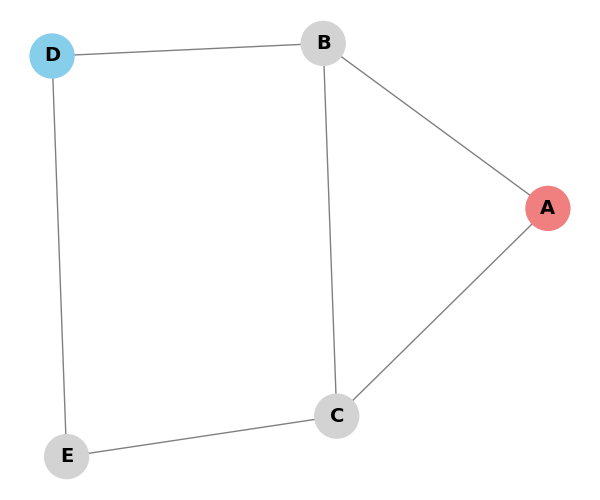

In [30]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt

# Definimos los nodos y sus posiciones
nodes = ['A', 'B', 'C', 'D', 'E']
labels = {'A': 0, 'B': None, 'C': None, 'D': 1, 'E': None}

# Matriz de adyacencia no ponderada (grafo no dirigido)
#     A  B  C  D  E
W = np.array([
    [0, 1, 1, 0, 0],  # A
    [1, 0, 1, 1, 0],  # B
    [1, 1, 0, 0, 1],  # C
    [0, 1, 0, 0, 1],  # D
    [0, 0, 1, 1, 0],  # E
])

# W.sum(axis=1) # Vecinos, matriz diagonal de grados



## Algoritmo 

1. **Inicializar** matriz de etiquetas $Y$, donde cada fila representa una clase (one-hot para etiquetados, ceros para no etiquetados).

In [14]:
# Matriz de etiquetas iniciales (2 clases: 0 y 1)
Y = np.zeros((5, 2))
Y[0, 0] = 1  # A
Y[3, 1] = 1  # D

print(Y)

[[1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]]


2. **Construir** matriz de transición $T = D^{-1}W$, donde $D$ es la matriz diagonal de grados.

In [16]:
# Normalizamos la matriz W para obtener la matriz de transición T
D_inv = np.diag(1 / W.sum(axis=1))
T = D_inv @ W

print(T)

[[0.5        0.         0.         0.         0.        ]
 [0.         0.33333333 0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.5        0.        ]
 [0.         0.         0.         0.         0.5       ]]

[[0.         0.5        0.5        0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.        ]
 [0.33333333 0.33333333 0.         0.         0.33333333]
 [0.         0.5        0.         0.         0.5       ]
 [0.         0.         0.5        0.5        0.        ]]


3. **Iterar**:

$$
F^{(t+1)} = T F^{(t)}
$$

4. En cada paso, **reestablecer etiquetas conocidas**:

$$
F_i = Y_i \text{ para } i \in L
$$

5. Repetir hasta que $F$ **converja**.

In [21]:
# Matriz F inicial
F = Y.copy()

# Para mantener etiquetas conocidas fijas
fixed = [0, 3]

# Iteración de propagación
history = [F.copy()]
for _ in range(10):
    F_new = T @ F
    for i in fixed:
        F_new[i] = Y[i]
    if np.allclose(F, F_new, atol=0.00001):
        break
    F = F_new
    history.append(F.copy())

6. Cada nodo se etiqueta con la clase de mayor valor en su fila de $F$.

In [22]:
print (F)

[[1.         0.        ]
 [0.53790178 0.46077516]
 [0.61436688 0.3839793 ]
 [0.         1.        ]
 [0.30685268 0.69116274]]


In [25]:
import pandas as pd

# Crear DataFrame final con etiquetas predichas
final_labels = np.argmax(F, axis=1)
df_labels = pd.DataFrame({
    'Nodo': nodes,
    'Clase 0 (prob)': F[:, 0],
    'Clase 1 (prob)': F[:, 1],
    'Etiqueta predicha': final_labels
})

print (df_labels)

  Nodo  Clase 0 (prob)  Clase 1 (prob)  Etiqueta predicha
0    A        1.000000        0.000000                  0
1    B        0.537902        0.460775                  0
2    C        0.614367        0.383979                  0
3    D        0.000000        1.000000                  1
4    E        0.306853        0.691163                  1


Iterando sobre las conexiones, la etiqueta se propaga hasta que todos los nodos se etiquetan:

| Nodo | Etiqueta final |
|------|----------------|
| A    | 0              |
| B    | 0              |
| C    | 0              |
| D    | 1              |
| E    | 1              |

## Paqueteria de Python que implementa Label Propagation



In [27]:
from sklearn.semi_supervised import LabelPropagation

In [29]:
from sklearn.preprocessing import LabelEncoder

# Datos del ejemplo: características ficticias para nodos A–E
# Creamos 2D embeddings arbitrarios para visualización y ejemplo
X = np.array([
    [0.0, 1.0],  # A
    [1.0, 1.0],  # B
    [1.0, 0.0],  # C
    [2.0, 1.0],  # D
    [2.0, 0.0],  # E
])

# Etiquetas iniciales (-1 = desconocida)
# A = 0, B = ?, C = ?, D = 1, E = ?
y = np.array([0, -1, -1, 1, -1])

# Entrenamos el modelo
model = LabelPropagation(kernel='knn', n_neighbors=2)
model.fit(X, y)

# Resultados
predicted_labels = model.transduction_

# Formato de salida
df_resultado = pd.DataFrame({
    'Nodo': ['A', 'B', 'C', 'D', 'E'],
    'Etiqueta inicial': ['0', '?', '?', '1', '?'],
    'Etiqueta predicha': predicted_labels
})

print(df_resultado)

  Nodo Etiqueta inicial  Etiqueta predicha
0    A                0                  0
1    B                ?                  0
2    C                ?                  0
3    D                1                  1
4    E                ?                  0
